<center><h2>Smart Building Data Analyst Assignment</h2></center>


## 1. Objective
Analyze the dataset, ensure its accuracy, and present the key insights through a small dashboard.

## 2. Target Audience 
Property Manager which has responsibilities include ensuring the building are well-maintained, addressing tenant concerns, managing budgets, and optimizing the use of spaces to improve overall efficiency and comfort.

## 3. Research Questions
##### 3.1. What are the key patterns and trends observed in the Indoor Air Quality (IAQ) and occupancy data?
##### 3.2. How does room occupancy influence the IAQ over time?
##### 3.3. Which room exhibits the highest occupancy rate, and what are the IAQ and comfort score trends within that room?
##### 3.4. Which sensor has the most missing data, and which parameter is most affected by missing values?
##### 3.5. Which environmental parameters (e.g., temperature, humidity, CO2) have the greatest impact on IAQ and comfort score based on the data?


## 4. Steps for Data Preparations and Explorations
#### 4.1. Data Loading
#### 4.2. Initial Data Inspection
#### 4.3. Data Cleaning
#### 4.4. Data Transformation
#### 4.5. Exploratory Data Analysis (EDA)

### 4.1. Data Loading

In [1]:
# Importing all libraries
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from ydata_profiling import ProfileReport


c:\Users\user\anaconda3\envs\Torch\lib\site-packages\tqdm\auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [2]:
# Reading the data
df = pd.read_csv(r'C:\Users\user\Documents\IndoorAirQuality_VistaDwiYulianti\Smart_Building_Data Analyst_Assignment_Tpex.csv')

In [3]:
# The purpose of a sneak peek is to get a quick overview of the data and identify any potential problems of areas of interest
df.head(20)

,TimeStamp,Id,Key,Value
0,2024-10-14 19:25:01,MultiSensor_12,temperature,21.76
1,2024-10-14 19:25:01,MultiSensor_12,humidity,38.44
2,2024-10-14 19:25:01,MultiSensor_12,lightintensity,2.15
3,2024-10-14 19:25:01,MultiSensor_12,co2,478
4,2024-10-14 19:25:01,MultiSensor_12,movement,0
5,2024-10-14 19:25:01,MultiSensor_12,tvoc,0.6256199
6,2024-10-14 19:25:01,MultiSensor_12,iaq,2.5070572
7,2024-10-14 19:25:01,MultiSensor_12,eco2,429
8,2024-10-14 19:25:01,MultiSensor_12,occupancy,available
9,2024-10-14 19:25:01,MultiSensor_12,comfort_score,0


In [4]:
# Reshape the data so each 'Key' becomes the columns
df = df.pivot_table(index=['TimeStamp','Id'],columns='Key',values='Value', aggfunc='first').reset_index()
df = df.sort_values(by=['Id', 'TimeStamp'])
df. head (20)

Key,TimeStamp,Id,co2,comfort_score,eco2,humidity,iaq,lightintensity,movement,occupancy,temperature,tvoc
0,2024-10-01 00:00:01,MultiSensor_11,460,0.83,445,64.61,3.3203633,0,0,available,20.21,1.9378958
8,2024-10-01 00:05:01,MultiSensor_11,436,0.78,444,63.09,3.2593272,0,0,available,20.2,1.8005645
16,2024-10-01 00:10:01,MultiSensor_11,460,0.81,444,64.03,3.288319,0,0,available,20.21,1.8463416
29,2024-10-01 00:15:03,MultiSensor_11,467,0.81,445,64.21,3.27306,0,0,available,20.21,1.8158236
32,2024-10-01 00:20:05,MultiSensor_11,478,0.84,446,64.36,3.3020523,NaN,0,available,NaN,1.8768597
44,2024-10-01 00:25:03,MultiSensor_11,497,0.86,446,64.55,3.3279927,0,0,available,20.17,1.9378958
48,2024-10-01 00:30:03,MultiSensor_11,496,0.88,446,64.62,3.2745862,0,0,available,20.15,1.8310826
56,2024-10-01 00:35:01,MultiSensor_11,442,0.89,446,64.76,3.3112078,0,0,available,20.14,1.9073777
64,2024-10-01 00:40:02,MultiSensor_11,412,0.91,447,64.84,3.27306,0,0,available,20.12,1.8158236
72,2024-10-01 00:45:01,MultiSensor_11,460,0.92,446,64.7,3.3188372,NaN,0,available,20.1,1.9226367


### 4.2. Initial Data Inspections

In [5]:
# Display a summary of the data frame, including column data types, non-null counts, and memory usage
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 71479 entries, 0 to 71474
Data columns (total 12 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   TimeStamp       71479 non-null  object
 1   Id              71479 non-null  object
 2   co2             63777 non-null  object
 3   comfort_score   71479 non-null  object
 4   eco2            70938 non-null  object
 5   humidity        70905 non-null  object
 6   iaq             70963 non-null  object
 7   lightintensity  63853 non-null  object
 8   movement        70905 non-null  object
 9   occupancy       70485 non-null  object
 10  temperature     63850 non-null  object
 11  tvoc            70963 non-null  object
dtypes: object(12)
memory usage: 7.1+ MB


It can be seen that the total rows in several columns are not same which indicate there is missing value. In addition the data type of each parameters are still not correct.

In [6]:
# Get summary statistics for each numeric column for raw data
df.describe()

Key,TimeStamp,Id,co2,comfort_score,eco2,humidity,iaq,lightintensity,movement,occupancy,temperature,tvoc
count,71479,71479,63777,71479,70938,70905,70963,63853,70905,70485,63850,70963
unique,20998,8,1340,466,1000,4068,2035,4134,101,3,724,325
top,2024-10-27 12:35:01,MultiSensor_11,468,0,425,59.43,0.99946594,0,0,available,20.55,0.015259022
freq,8,8935,613,32596,3523,64,3394,13213,59783,58323,484,5718


In [7]:
# Checking the total of null data
df.isnull().sum()

Key
TimeStamp            0
Id                   0
co2               7702
comfort_score        0
eco2               541
humidity           574
iaq                516
lightintensity    7626
movement           574
occupancy          994
temperature       7629
tvoc               516
dtype: int64

Based on the results, it is shown that the CO2 parameter has the highest amount of missing data, followed by light intensity, temperature, and occupancy. The remaining parameters have missing values ranging from 500 to 600, with the exception of the comfort score, which has no missing values.

In [8]:
# counting duplicate
counting_duplicate = df.duplicated().sum()
counting_duplicate

0

There are no duplicate values in the dataset.

### 4.3. Data Cleaning

In [9]:
# Change the occupancy data become integer
df['occupancy'] = df['occupancy'].replace({
    'available': 0,
    'occupied' : 1
})

In [10]:
# Change the data type of the parameters to numeric data
df[['co2', 'comfort_score', 'eco2', 'humidity', 'iaq', 'lightintensity', 'movement', 'occupancy', 'temperature', 'tvoc']] = df[['co2', 'comfort_score', 'eco2', 'humidity', 'iaq', 'lightintensity', 'movement', 'occupancy', 'temperature', 'tvoc']].apply(pd.to_numeric, errors='coerce')
df.sample(5)


# df.info()

Key,TimeStamp,Id,co2,comfort_score,eco2,humidity,iaq,lightintensity,movement,occupancy,temperature,tvoc
39231,2024-10-18 00:20:03,MultiSensor_11,492.0,0.89,447.0,72.87,3.680476,0.00,0.0,0.0,NaN,2.929732
51267,2024-10-23 05:40:06,MultiSensor_32,529.0,0.00,461.0,48.13,1.449607,85.20,0.0,1.0,21.15,0.061036
13041,2024-10-06 15:50:03,MultiSensor_18,403.0,0.00,430.0,41.97,2.377356,7.57,0.0,0.0,21.39,0.503548
24204,2024-10-11 11:45:03,MultiSensor_12,NaN,0.00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
36868,2024-10-16 23:40:03,MultiSensor_35,513.0,0.00,441.0,59.38,2.926680,0.00,0.0,0.0,21.59,1.159686


In [11]:
# Change the movement data become boolean 
df['movement'] = (df['movement']>= 1).astype(int)
df.sample (20)

Key,TimeStamp,Id,co2,comfort_score,eco2,humidity,iaq,lightintensity,movement,occupancy,temperature,tvoc
55326,2024-10-24 23:50:01,MultiSensor_43,455.0,0.72,438.0,50.77,1.081865,0.00,0,0.0,20.14,0.015259
44935,2024-10-20 11:45:01,MultiSensor_11,NaN,1.16,434.0,71.00,3.062486,54.66,0,0.0,20.08,1.388571
19078,2024-10-09 06:30:03,MultiSensor_35,480.0,1.06,436.0,60.12,2.738994,1.19,0,0.0,19.75,0.885023
64452,2024-10-28 22:55:06,MultiSensor_34,460.0,0.00,438.0,55.84,2.729839,0.00,0,0.0,21.53,0.869764
12698,2024-10-06 12:15:01,MultiSensor_19,424.0,0.10,439.0,41.52,2.574197,4.56,0,0.0,20.88,0.686656
67593,2024-10-30 07:35:03,MultiSensor_11,486.0,1.36,443.0,59.57,1.971466,6.15,0,0.0,19.38,0.228885
44548,2024-10-20 07:40:01,MultiSensor_34,459.0,0.00,428.0,59.28,2.804608,0.12,0,0.0,21.18,0.976577
65220,2024-10-29 06:55:02,MultiSensor_34,465.0,0.00,439.0,56.60,2.653544,6.50,0,0.0,21.27,0.778210
22771,2024-10-10 20:55:03,MultiSensor_18,455.0,0.03,446.0,39.19,1.762417,0.24,0,0.0,NaN,0.152590
69259,2024-10-31 00:55:03,MultiSensor_18,455.0,0.00,449.0,51.22,2.038605,0.12,0,0.0,21.80,0.274662


In [12]:
# Rounding up to 2 numbers after coma
df[['co2', 'comfort_score', 'eco2', 'humidity', 'iaq','lightintensity', 'movement', 'occupancy', 'temperature', 'tvoc']] = df[['co2', 'comfort_score', 'eco2', 'humidity', 'iaq','lightintensity', 'movement', 'occupancy', 'temperature', 'tvoc'
]].round(2)
df.sample (10)

Key,TimeStamp,Id,co2,comfort_score,eco2,humidity,iaq,lightintensity,movement,occupancy,temperature,tvoc
58996,2024-10-26 14:05:04,MultiSensor_19,503.0,0.02,427.0,60.65,2.78,2.64,0,0.0,21.97,0.95
1795,2024-10-01 18:40:01,MultiSensor_34,419.0,0.00,442.0,56.32,2.90,16.87,1,1.0,21.73,1.11
37795,2024-10-17 09:20:02,MultiSensor_43,774.0,1.37,776.0,65.85,3.71,91.12,1,1.0,NaN,3.02
50640,2024-10-22 23:10:02,MultiSensor_12,542.0,0.00,445.0,49.28,2.22,2.04,0,0.0,21.53,0.38
62158,2024-10-27 23:00:03,MultiSensor_35,510.0,0.00,425.0,53.07,1.97,0.00,0,0.0,21.55,0.23
4630,2024-10-03 00:10:07,MultiSensor_34,417.0,0.29,442.0,44.33,1.13,0.00,0,0.0,20.65,0.02
38920,2024-10-17 21:05:04,MultiSensor_11,513.0,0.97,452.0,72.81,3.73,0.00,0,0.0,20.43,3.08
41318,2024-10-18 22:00:03,MultiSensor_43,502.0,0.38,450.0,65.29,3.31,0.12,0,0.0,20.77,1.89
60280,2024-10-27 03:30:02,MultiSensor_12,NaN,0.00,430.0,57.32,2.46,2.04,0,0.0,22.11,0.58
45022,2024-10-20 12:35:02,MultiSensor_19,NaN,0.00,445.0,55.99,2.69,4.68,0,0.0,22.01,0.82


In [13]:
# Change timestamp become datetime type
df['TimeStamp'] = pd.to_datetime(df['TimeStamp'])
df.sample(10)

Key,TimeStamp,Id,co2,comfort_score,eco2,humidity,iaq,lightintensity,movement,occupancy,temperature,tvoc
1267,2024-10-01 13:10:01,MultiSensor_43,633.0,0.08,446.0,62.23,3.04,111.84,0,0.0,21.09,1.34
14074,2024-10-07 02:30:02,MultiSensor_18,440.0,0.00,442.0,52.07,2.91,0.12,0,0.0,NaN,1.13
65356,2024-10-29 08:20:02,MultiSensor_11,605.0,0.81,674.0,63.94,2.96,49.42,1,1.0,20.20,1.22
30240,2024-10-14 02:40:01,MultiSensor_12,509.0,0.00,425.0,38.89,2.71,2.04,0,0.0,21.93,0.85
61193,2024-10-27 13:00:07,MultiSensor_18,468.0,0.00,425.0,51.15,1.58,6.84,0,0.0,22.01,0.09
47166,2024-10-21 10:55:01,MultiSensor_43,858.0,0.43,650.0,60.55,2.93,195.36,1,1.0,21.49,1.16
67568,2024-10-30 07:20:01,MultiSensor_32,507.0,0.00,524.0,51.90,1.46,85.68,0,0.0,NaN,0.06
43745,2024-10-19 23:20:01,MultiSensor_19,487.0,0.00,451.0,55.98,2.77,2.28,0,0.0,22.12,0.93
10899,2024-10-05 17:30:03,MultiSensor_19,436.0,0.00,437.0,36.92,1.18,2.52,0,0.0,21.73,0.03
61007,2024-10-27 11:05:01,MultiSensor_19,452.0,0.00,434.0,48.04,1.00,2.39,0,0.0,22.13,0.02


In [51]:
df.head(20)

Key,TimeStamp,Id,co2,comfort_score,eco2,humidity,iaq,lightintensity,movement,occupancy,temperature,tvoc
0,2024-10-01 00:00:01,MultiSensor_11,460.0,0.83,445.0,64.61,3.32,0.0,0,0.0,20.21,1.94
8,2024-10-01 00:05:01,MultiSensor_11,436.0,0.78,444.0,63.09,3.26,0.0,0,0.0,20.20,1.80
16,2024-10-01 00:10:01,MultiSensor_11,460.0,0.81,444.0,64.03,3.29,0.0,0,0.0,20.21,1.85
29,2024-10-01 00:15:03,MultiSensor_11,467.0,0.81,445.0,64.21,3.27,0.0,0,0.0,20.21,1.82
32,2024-10-01 00:20:05,MultiSensor_11,478.0,0.84,446.0,64.36,3.30,NaN,0,0.0,NaN,1.88
44,2024-10-01 00:25:03,MultiSensor_11,497.0,0.86,446.0,64.55,3.33,0.0,0,0.0,20.17,1.94
48,2024-10-01 00:30:03,MultiSensor_11,496.0,0.88,446.0,64.62,3.27,0.0,0,0.0,20.15,1.83
56,2024-10-01 00:35:01,MultiSensor_11,442.0,0.89,446.0,64.76,3.31,0.0,0,0.0,20.14,1.91
64,2024-10-01 00:40:02,MultiSensor_11,412.0,0.91,447.0,64.84,3.27,0.0,0,0.0,20.12,1.82
72,2024-10-01 00:45:01,MultiSensor_11,460.0,0.92,446.0,64.70,3.32,NaN,0,0.0,20.10,1.92


In [14]:
# Get summary statistics for each numeric column
df.describe()


Key,TimeStamp,co2,comfort_score,eco2,humidity,iaq,lightintensity,movement,occupancy,temperature,tvoc
count,71479,63777.000000,71479.000000,70938.000000,70905.000000,70963.000000,63853.000000,71479.000000,70481.000000,63850.000000,70963.000000
mean,2024-10-16 11:58:39.016004608,548.165906,0.354866,504.013970,51.555766,2.475120,27.135177,0.155598,0.172500,21.451883,0.829661
min,2024-10-01 00:00:01,362.000000,0.000000,416.000000,-20.000000,1.000000,0.000000,0.000000,0.000000,18.410000,0.020000
25%,2024-10-08 17:55:08,452.000000,0.000000,430.000000,44.860000,2.100000,0.120000,0.000000,0.000000,20.620000,0.310000
50%,2024-10-16 11:55:05,486.000000,0.060000,441.000000,52.440000,2.700000,2.280000,0.000000,0.000000,21.330000,0.840000
75%,2024-10-24 06:00:01,552.000000,0.500000,467.000000,58.660000,2.880000,32.170000,0.000000,0.000000,22.010000,1.080000
max,2024-10-31 23:55:12,2999.000000,6.540000,1919.000000,73.120000,4.620000,511.360000,1.000000,1.000000,49.000000,7.230000
std,NaN,212.586387,0.568790,154.026719,10.462980,0.678148,54.243205,0.362476,0.377817,2.002207,0.649451


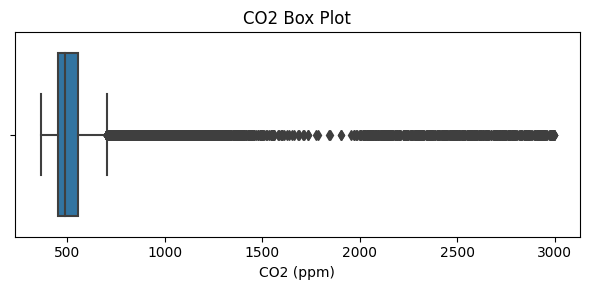

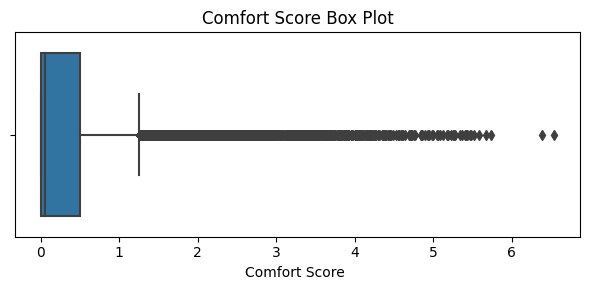

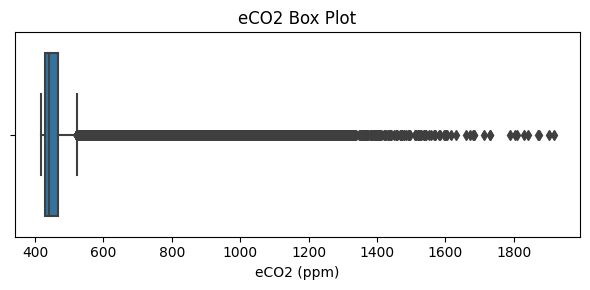

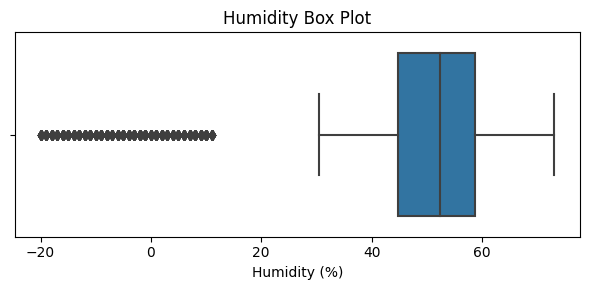

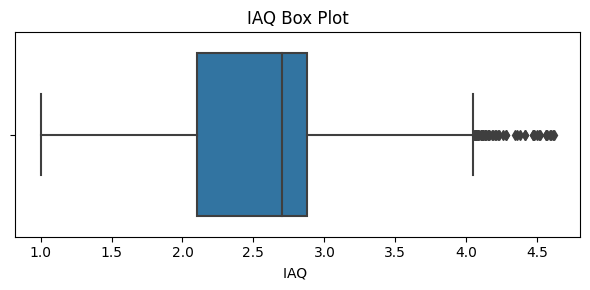

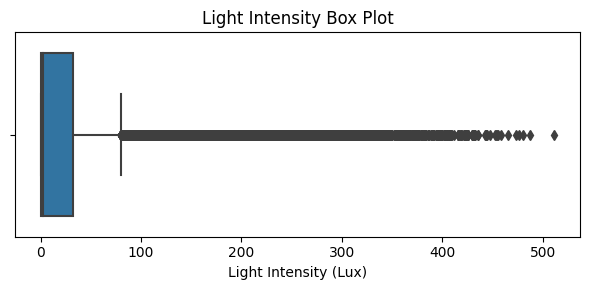

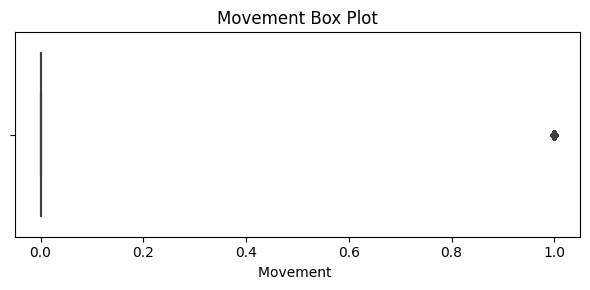

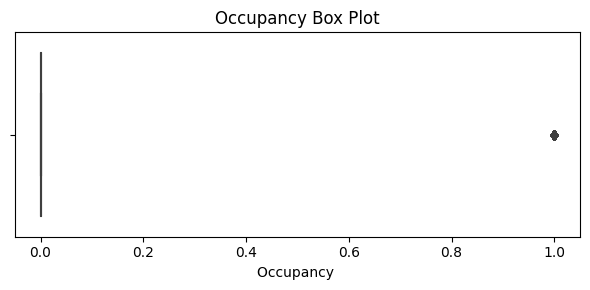

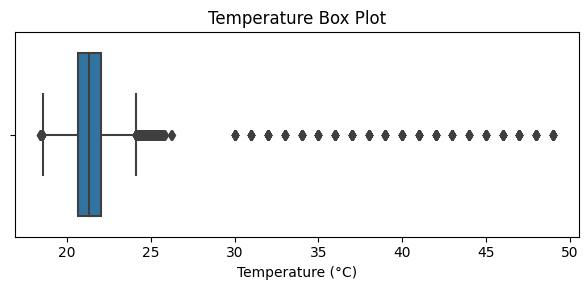

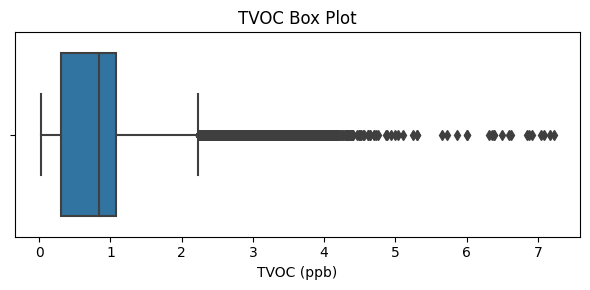

In [15]:
# Create box plot to observe the data distribution
# Make lists for observed columns, titles, and units
columns = ['co2', 'comfort_score', 'eco2', 'humidity', 'iaq', 'lightintensity', 
           'movement', 'occupancy', 'temperature', 'tvoc']

titles = ['CO2','Comfort Score','eCO2','Humidity','IAQ','Light Intensity',
          'Movement','Occupancy','Temperature','TVOC']

units = ['ppm', '', 'ppm', '%', '', 'Lux', '', '', '°C', 'ppb']

# Loop through each column and plot
for col, title, unit in zip(columns, titles, units):
    plt.figure(figsize=(6,3))
    sns.boxplot(x=df[col])
    plt.title(f'{title} Box Plot')
    plt.xlabel(f'{title} {f"({unit})" if unit else ""}')
    plt.tight_layout()
    plt.show()

Based on the boxplot, several data points fall outside the typical range and may be classified as potential outliers.

### 4.4. Data Transformation

### 🧹 Outlier Removal Using IQR Method

To identify and remove outliers, we used the **Interquartile Range (IQR)** method:

- **Q1** = 25th percentile  
- **Q3** = 75th percentile  
- **IQR** = Q3 - Q1

Any data point that falls outside the following range is considered an outlier:

$$
\text{Lower Bound} = Q1 - 1.5 \times IQR \\
\text{Upper Bound} = Q3 + 1.5 \times IQR
$$

All values outside this range are removed from the dataset to ensure data quality and reduce skew in analysis.


In [16]:
# Change the outlier to nan-value using IQR method
# Columns you want to check for outliers
target_columns = ['co2', 'comfort_score', 'eco2', 'humidity', 'iaq',
                   'temperature', 'tvoc']

# Function to replace outliers with NaN using IQR method
def replace_outliers_iqr(group, col):
    Q1 = group[col].quantile(0.25)
    Q3 = group[col].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    return group[col].where((group[col] >= lower_bound) & (group[col] <= upper_bound), pd.NA)

# Apply per column and per sensor Id
for col in target_columns:
    df[col] = df.groupby('Id', group_keys=False).apply(lambda g: replace_outliers_iqr(g, col))

### 🔄 Interpolation Formula (Time-Based)

To fill in missing values in a time series, we use **linear interpolation** based on time. For a missing value at time \( t \), the interpolated value is estimated using:

$$
x(t) = x(t_1) + \frac{(t - t_1)}{(t_2 - t_1)} \times [x(t_2) - x(t_1)]
$$

Where:
- \( x(t) \) is the interpolated value at time \( t \)
- \( x(t_1) \) and \( x(t_2) \) are known values before and after the missing point
- \( t_1 < t < t_2 \)

We apply this formula within each group (e.g., by sensor `Id`) to ensure the continuity of time-based trends. The direction is set to **both forward and backward** to handle edge cases.


In [17]:
# interpolate the missing data for certain columns

# Make columns for interpolate
interpolate_columns = ['co2', 'comfort_score', 'eco2', 'humidity', 'iaq',
                       'lightintensity', 'temperature', 'tvoc']

# Setting index
df = df.set_index('TimeStamp')

# Interpolate using groupby, preserving the index
def interpolate_group(group):
    return group[interpolate_columns].interpolate(method='time', limit_direction='both')

# Apply interpolation per Id
df[interpolate_columns] = df.groupby('Id', group_keys=False).apply(interpolate_group)


In [18]:
#reseting the index
df = df.reset_index()
df.head(20)

Key,TimeStamp,Id,co2,comfort_score,eco2,humidity,iaq,lightintensity,movement,occupancy,temperature,tvoc
0,2024-10-01 00:00:01,MultiSensor_11,460.000000,0.83,445.0,64.61,3.32,0.0,0,0.0,20.210000,1.94
1,2024-10-01 00:05:01,MultiSensor_11,436.000000,0.78,444.0,63.09,3.26,0.0,0,0.0,20.200000,1.80
2,2024-10-01 00:10:01,MultiSensor_11,460.000000,0.81,444.0,64.03,3.29,0.0,0,0.0,20.210000,1.85
3,2024-10-01 00:15:03,MultiSensor_11,467.000000,0.81,445.0,64.21,3.27,0.0,0,0.0,20.210000,1.82
4,2024-10-01 00:20:05,MultiSensor_11,478.000000,0.84,446.0,64.36,3.30,0.0,0,0.0,20.189867,1.88
5,2024-10-01 00:25:03,MultiSensor_11,497.000000,0.86,446.0,64.55,3.33,0.0,0,0.0,20.170000,1.94
6,2024-10-01 00:30:03,MultiSensor_11,496.000000,0.88,446.0,64.62,3.27,0.0,0,0.0,20.150000,1.83
7,2024-10-01 00:35:01,MultiSensor_11,442.000000,0.89,446.0,64.76,3.31,0.0,0,0.0,20.140000,1.91
8,2024-10-01 00:40:02,MultiSensor_11,412.000000,0.91,447.0,64.84,3.27,0.0,0,0.0,20.120000,1.82
9,2024-10-01 00:45:01,MultiSensor_11,460.000000,0.92,446.0,64.70,3.32,0.0,0,0.0,20.100000,1.92


In [19]:
# Checking the summary data after interpolation
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 71479 entries, 0 to 71478
Data columns (total 12 columns):
 #   Column          Non-Null Count  Dtype         
---  ------          --------------  -----         
 0   TimeStamp       71479 non-null  datetime64[ns]
 1   Id              71479 non-null  object        
 2   co2             71479 non-null  float64       
 3   comfort_score   71479 non-null  float64       
 4   eco2            71479 non-null  float64       
 5   humidity        71479 non-null  float64       
 6   iaq             71479 non-null  float64       
 7   lightintensity  71479 non-null  float64       
 8   movement        71479 non-null  int32         
 9   occupancy       70481 non-null  float64       
 10  temperature     71479 non-null  float64       
 11  tvoc            71479 non-null  float64       
dtypes: datetime64[ns](1), float64(9), int32(1), object(1)
memory usage: 6.3+ MB


It can be seen that there is no missing value.

In [20]:
df.describe()

Key,TimeStamp,co2,comfort_score,eco2,humidity,iaq,lightintensity,movement,occupancy,temperature,tvoc
count,71479,71479.000000,71479.000000,71479.000000,71479.000000,71479.000000,71479.000000,71479.000000,70481.000000,71479.000000,71479.000000
mean,2024-10-16 11:58:39.016004608,509.109862,0.298633,454.627621,52.130044,2.489848,27.406686,0.155598,0.172500,21.287612,0.810069
min,2024-10-01 00:00:01,362.000000,0.000000,416.000000,30.520000,1.000000,0.000000,0.000000,0.000000,18.410000,0.020000
25%,2024-10-08 17:55:08,452.466339,0.000000,430.000000,45.030000,2.090000,0.120000,0.000000,0.000000,20.620000,0.290000
50%,2024-10-16 11:55:05,485.000000,0.000000,441.000000,52.520000,2.700000,2.280000,0.000000,0.000000,21.320000,0.840000
75%,2024-10-24 06:00:01,543.391327,0.430000,464.000000,58.685042,2.880000,32.530000,0.000000,0.000000,21.990000,1.080000
max,2024-10-31 23:55:12,794.000000,2.650000,634.000000,73.120000,4.110000,511.360000,1.000000,1.000000,24.110000,3.010000
std,NaN,83.175405,0.469601,37.068064,8.601364,0.645102,54.396456,0.362476,0.377817,0.988694,0.593270


### 4.5. Exploration Data Analysis

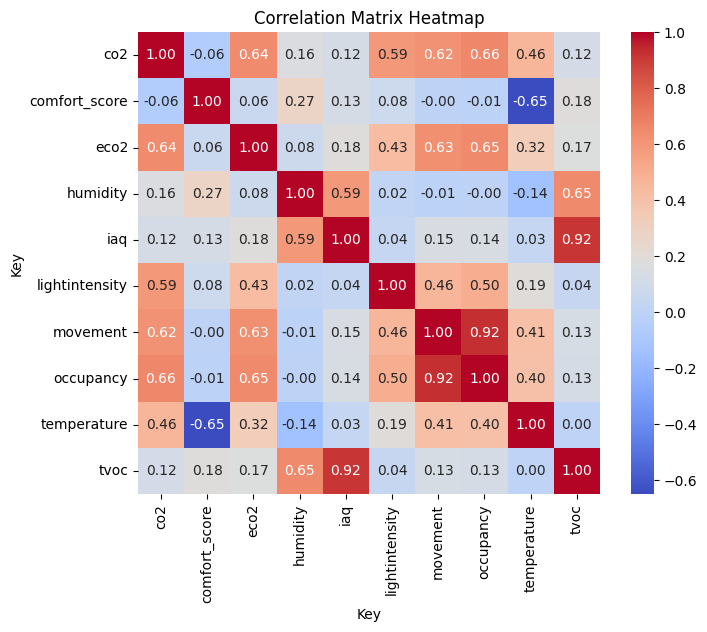

In [21]:
# Observe the correlation matrix
corr_max = df[['co2', 'comfort_score', 'eco2', 'humidity', 'iaq', 'lightintensity', 
           'movement', 'occupancy', 'temperature', 'tvoc']].corr()
plt.figure(figsize=(8,6))
sns.heatmap(corr_max, annot=True, fmt=".2f", cmap='coolwarm', square=True)
plt.title('Correlation Matrix Heatmap')
plt.show()

Based on this correlation, it can be seen that the IAQ value has a high correlation with TVOC and IAQ itself, showing a positive relationship of more than 0.5. Meanwhile, the comfort score has the strongest negative relationship with temperature. Occupancy has the strongest correlation with movement, eCO2, and CO2.

#### Make model for filling missing value in movement data

In [22]:
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

# Define the data
df_movement_known = df[df['movement'].notna()]
df_movement_unknown = df[df['movement'].isna()]

# Define features affecting the movement
features = ['eco2', 'co2', 'temperature'] #parameters that have high correlation with movement
X = df_movement_known[features]
y = df_movement_known['movement']

# Split data into training and test sets (80% train, 20% test)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize and train the model
model = DecisionTreeClassifier(max_depth=4, random_state=42)
model.fit(X_train, y_train)

# Make predictions on the test set
y_pred = model.predict(X_test)

# Show the accuracy
accuracy = accuracy_score(y_test, y_pred)
print(f"Model Accuracy: {accuracy:.2%}")

# Show classification report
print("\nClassification Report:")
print(classification_report(y_test, y_pred))

# Show Confusion Matrix
print("\nConfusion Matrix:")
print(confusion_matrix(y_test, y_pred))

# Filling the missing value with the model
if not df_movement_unknown.empty:
    df.loc[df_movement_unknown.index, 'movement'] = model.predict(df_movement_unknown[features])
else:
    print("✅ No missing movement values left to predict.")
df.head(10)

Model Accuracy: 92.64%

Classification Report:
              precision    recall  f1-score   support

           0       0.97      0.94      0.96     12036
           1       0.73      0.85      0.79      2260

    accuracy                           0.93     14296
   macro avg       0.85      0.90      0.87     14296
weighted avg       0.93      0.93      0.93     14296


Confusion Matrix:
[[11321   715]
 [  337  1923]]
✅ No missing movement values left to predict.


Key,TimeStamp,Id,co2,comfort_score,eco2,humidity,iaq,lightintensity,movement,occupancy,temperature,tvoc
0,2024-10-01 00:00:01,MultiSensor_11,460.0,0.83,445.0,64.61,3.32,0.0,0,0.0,20.210000,1.94
1,2024-10-01 00:05:01,MultiSensor_11,436.0,0.78,444.0,63.09,3.26,0.0,0,0.0,20.200000,1.80
2,2024-10-01 00:10:01,MultiSensor_11,460.0,0.81,444.0,64.03,3.29,0.0,0,0.0,20.210000,1.85
3,2024-10-01 00:15:03,MultiSensor_11,467.0,0.81,445.0,64.21,3.27,0.0,0,0.0,20.210000,1.82
4,2024-10-01 00:20:05,MultiSensor_11,478.0,0.84,446.0,64.36,3.30,0.0,0,0.0,20.189867,1.88
5,2024-10-01 00:25:03,MultiSensor_11,497.0,0.86,446.0,64.55,3.33,0.0,0,0.0,20.170000,1.94
6,2024-10-01 00:30:03,MultiSensor_11,496.0,0.88,446.0,64.62,3.27,0.0,0,0.0,20.150000,1.83
7,2024-10-01 00:35:01,MultiSensor_11,442.0,0.89,446.0,64.76,3.31,0.0,0,0.0,20.140000,1.91
8,2024-10-01 00:40:02,MultiSensor_11,412.0,0.91,447.0,64.84,3.27,0.0,0,0.0,20.120000,1.82
9,2024-10-01 00:45:01,MultiSensor_11,460.0,0.92,446.0,64.70,3.32,0.0,0,0.0,20.100000,1.92


In [23]:
# filling the the missing occupancy data based on the movement because it has strong correlation
df.loc[(df['occupancy'].isna()) & (df['movement'] < 1), 'occupancy'] = 0
df.loc[(df['occupancy'].isna()) & (df['movement'] >= 1), 'occupancy'] = 1

In [24]:
# adding duration for analysis purpose

# Calculate the time difference between consecutive rows
df['duration'] = df['TimeStamp'].diff()

# Display the result
df.head(30)

Key,TimeStamp,Id,co2,comfort_score,eco2,humidity,iaq,lightintensity,movement,occupancy,temperature,tvoc,duration
0,2024-10-01 00:00:01,MultiSensor_11,460.000000,0.83,445.0,64.61,3.32,0.0,0,0.0,20.210000,1.94,NaT
1,2024-10-01 00:05:01,MultiSensor_11,436.000000,0.78,444.0,63.09,3.26,0.0,0,0.0,20.200000,1.80,0 days 00:05:00
2,2024-10-01 00:10:01,MultiSensor_11,460.000000,0.81,444.0,64.03,3.29,0.0,0,0.0,20.210000,1.85,0 days 00:05:00
3,2024-10-01 00:15:03,MultiSensor_11,467.000000,0.81,445.0,64.21,3.27,0.0,0,0.0,20.210000,1.82,0 days 00:05:02
4,2024-10-01 00:20:05,MultiSensor_11,478.000000,0.84,446.0,64.36,3.30,0.0,0,0.0,20.189867,1.88,0 days 00:05:02
5,2024-10-01 00:25:03,MultiSensor_11,497.000000,0.86,446.0,64.55,3.33,0.0,0,0.0,20.170000,1.94,0 days 00:04:58
6,2024-10-01 00:30:03,MultiSensor_11,496.000000,0.88,446.0,64.62,3.27,0.0,0,0.0,20.150000,1.83,0 days 00:05:00
7,2024-10-01 00:35:01,MultiSensor_11,442.000000,0.89,446.0,64.76,3.31,0.0,0,0.0,20.140000,1.91,0 days 00:04:58
8,2024-10-01 00:40:02,MultiSensor_11,412.000000,0.91,447.0,64.84,3.27,0.0,0,0.0,20.120000,1.82,0 days 00:05:01
9,2024-10-01 00:45:01,MultiSensor_11,460.000000,0.92,446.0,64.70,3.32,0.0,0,0.0,20.100000,1.92,0 days 00:04:59


In [25]:
# adding working hours flag
def is_working_time_and_day(timestamp):
    # Check if the day is a working day (Monday=0, Sunday=6)
    is_working_day = timestamp.weekday() < 5  # Monday to Friday = True, Saturday/Sunday = False
    
    # Check if the hour is between 9 AM and 6 PM
    is_working_hours = 8 <= timestamp.hour < 18
    
    # Return True if both conditions are met
    return is_working_day and is_working_hours

# Apply the function to the 'Timestamp' column and create a new column 'Is Working Time'
df['is_working_time'] = df['TimeStamp'].apply(is_working_time_and_day)


In [62]:
# make column to calculate duration with the occupancy
df['occupied_duration'] = df['duration'].where(df['occupancy'] == 1)
df['occupied_duration'] = df['occupied_duration'].fillna(pd.Timedelta(0))
df.head(700)

Key,TimeStamp,Id,co2,comfort_score,eco2,humidity,iaq,lightintensity,movement,occupancy,temperature,tvoc,duration,is_working_time,occupied_duration
0,2024-10-01 00:00:01,MultiSensor_11,460.000000,0.83,445.000000,64.61,3.32,0.00,0,0.0,20.210000,1.94,NaT,False,0 days 00:00:00
1,2024-10-01 00:05:01,MultiSensor_11,436.000000,0.78,444.000000,63.09,3.26,0.00,0,0.0,20.200000,1.80,0 days 00:05:00,False,0 days 00:00:00
2,2024-10-01 00:10:01,MultiSensor_11,460.000000,0.81,444.000000,64.03,3.29,0.00,0,0.0,20.210000,1.85,0 days 00:05:00,False,0 days 00:00:00
3,2024-10-01 00:15:03,MultiSensor_11,467.000000,0.81,445.000000,64.21,3.27,0.00,0,0.0,20.210000,1.82,0 days 00:05:02,False,0 days 00:00:00
4,2024-10-01 00:20:05,MultiSensor_11,478.000000,0.84,446.000000,64.36,3.30,0.00,0,0.0,20.189867,1.88,0 days 00:05:02,False,0 days 00:00:00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
695,2024-10-03 09:55:01,MultiSensor_11,568.000000,0.68,496.260032,45.13,2.71,106.84,1,1.0,22.397059,0.84,0 days 00:05:00,True,0 days 00:05:00
696,2024-10-03 10:00:01,MultiSensor_11,566.666667,0.32,496.034104,44.81,2.70,107.36,1,1.0,22.393529,0.84,0 days 00:05:00,True,0 days 00:05:00
697,2024-10-03 10:05:01,MultiSensor_11,565.333333,0.34,495.808176,45.37,2.71,104.92,1,1.0,22.390000,0.84,0 days 00:05:00,True,0 days 00:05:00
698,2024-10-03 10:10:01,MultiSensor_11,564.000000,0.00,495.582249,45.37,2.69,107.22,0,1.0,22.180000,0.82,0 days 00:05:00,True,0 days 00:05:00


In [26]:
df.to_csv('ProcessedDataFinal.csv',index = False)

-----------------------------------------------------------------------------------------